#### Accuracy vs. Temp (and spread) for three categories of variables 

In [1]:
import os
import numpy as np
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt
import matplotlib
import time

In [2]:
plt.rcParams.update({
    "text.usetex": True
})

### For each spread, three different categories in one plot 



In [3]:
legend_label = {"g":"G", 
                "ab": "Abundance", 
                "topo":"Topology", 
                "g_ab": "G + Abundance", 
                "g_topo": "G + Topology", 
                'topo_ab':"Topology + Abundance", 
                'g_topo_ab': "G + Topology + Abundance",
                'degree': r'$\langle k \rangle$', 
                'cc': r'$\langle C \rangle$',
                'spl': r'$\langle \ell \rangle$' , 
                'neighbor': r'$\langle k_{nn} \rangle$',
                'betw': r'$\langle g(v) \rangle$', 
                'edgebetw': r'$\langle g(e) \rangle$',
                'g_degree': "G + %s"%r'$\langle k \rangle$',
                'g_cc': "G + %s"%r'$\langle C \rangle$', 
                'g_spl': "G + %s"%r'$\langle \ell \rangle$', 
                'g_neighbor': "G + %s"%r'$\langle k_{nn} \rangle$', 
                'g_betw': "G + %s"%r'$\langle g(v) \rangle$', 
                'g_edgebetw': "G + %s"%r'$\langle g(e) \rangle$', 
                "CH4": r"$\mathrm{CH}_4$", 
                "CO": r"$\mathrm{CO}$", 
                "H2O": r"$\mathrm{H_2O}$", 
                "NH3": r"$\mathrm{NH}_3$",
                'g_CO': "G + %s"%r"$\mathrm{CO}$", 
                'g_CH4': "G + %s"%r"$\mathrm{CH}_4$",
                'g_NH3': "G + %s"%r"$\mathrm{NH}_3$",
                'g_H2O': "G + %s"%r"$\mathrm{H_2O}$", 
                'CO_NH3': "%s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$"),
                'g_CO_NH3': "G + %s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$"),
                'spl_neighbor_betw_edgebetw': "%s + %s + %s + %s"%(r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$'), 
                'g_spl_neighbor_betw_edgebetw': "G + %s + %s + %s + %s"%(r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$'),
                'top_predictor': "G + %s + %s + %s + %s + %s + %s"%(r"$\mathrm{CO}$", r"$\mathrm{NH}_3$", 
                                                                    r'$\langle \ell \rangle$', r'$\langle k_{nn} \rangle$', 
                                                                   r'$\langle g(v) \rangle$', r'$\langle g(e) \rangle$')
                }

individual_group = ['g', 'topo', 'ab']
group_combination = ['topo_ab', 'g_topo', 'g_ab']
three_group = ['g_topo_ab']
simple_topo = ['degree', 'cc']
complex_topo = ['spl', 'neighbor']
betweenness = ['betw', 'edgebetw']
g_individual_topology = ['g_degree','g_cc', 'g_spl', 'g_neighbor', 'g_betw', 'g_edgebetw']
individual_abundance = ["CH4", "CO", "H2O", "NH3"]
g_individual_abundance = ['g_CO', 'g_CH4','g_NH3','g_H2O']
individual_topology = simple_topo + complex_topo + betweenness
individual_features = ['g'] + individual_abundance + individual_topology
best_predictors = ['CO_NH3', 'spl_neighbor_betw_edgebetw','g_CO_NH3', 'g_spl_neighbor_betw_edgebetw','top_predictor']


In [ ]:
data_dir = "/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/"
plot_dir = "/Users/hkim78/work/HotJupiter/plot/atmosphere-uncertainty/machine_learning/2021/"

mean_temp = np.arange(400, 2100, 100)

### Main Figure

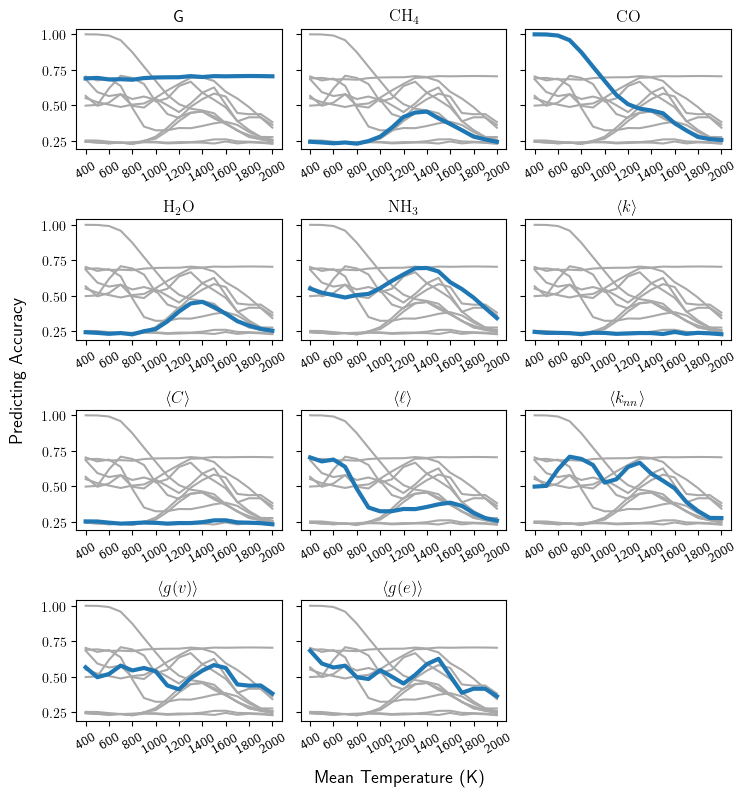

In [4]:
# Main Figure
spread = "50"

fig, ax = plt.subplots(4, 3, sharey = True, figsize = (7.5, 8))

i = 0; j = 0
for feature_group in individual_features:

    # all individual_features in the background
    for common_feature_group in individual_features:
        input_path = data_dir + "accuracy_%s.json"%common_feature_group
        with open(input_path) as infile:
            a = json.load(infile)
        ax[i, j].plot(a[spread], label = legend_label[common_feature_group], color='darkgrey')

    input_path = data_dir + "accuracy_%s.json"%feature_group

    with open(input_path) as infile:
        a = json.load(infile)
    ax[i, j].plot(a[spread], label = legend_label[feature_group], linewidth=3)
    ax[i, j].set_xticks(np.arange(0, 17, 2))
    ax[i, j].set_xticklabels(np.arange(400, 2100, 200), fontsize=10, rotation=30)
    ax[i, j].yaxis.set_tick_params(labelsize=10)
    ax[i, j].set_title("%s"%legend_label[feature_group])

    ### Set white yaxis label for empty space
    if j == 0:
        ax[i, j].set_ylabel("ylabel", color="white",fontsize=15) 
    ### Set white xaxis label for empty space
    if i == 3:
        ax[i, j].set_xlabel("xlabel", color="white",fontsize=15)

    if j < 2:
        j += 1
    else:
        i += 1
        j = 0

### Set common yaxis label        
fig.text(0.02,0.53, "Predicting Accuracy", ha="center", va="center", rotation=90, fontsize=13)
### Set common xaxis label
fig.text(0.53, 0.02, 'Mean Temperature (K)', ha='center', va="center", fontsize=13)

### Delete ax with no data 
for x in ax.flat:
    ## check if something was plotted 
    if not bool(x.has_data()):
        fig.delaxes(x)

plt.tight_layout(w_pad=0.5)

plt.savefig(plot_dir + "/png-files/supp_subplot_accuracy_spread_%s_all_individual_var.png"%spread, dpi=300)
plt.savefig(plot_dir + "/pdf-files/supp_subplot_accuracy_spread_%s_all_individual_var.pdf"%spread)
plt.show()

### Supp Figures with different uncertainties in temperature 

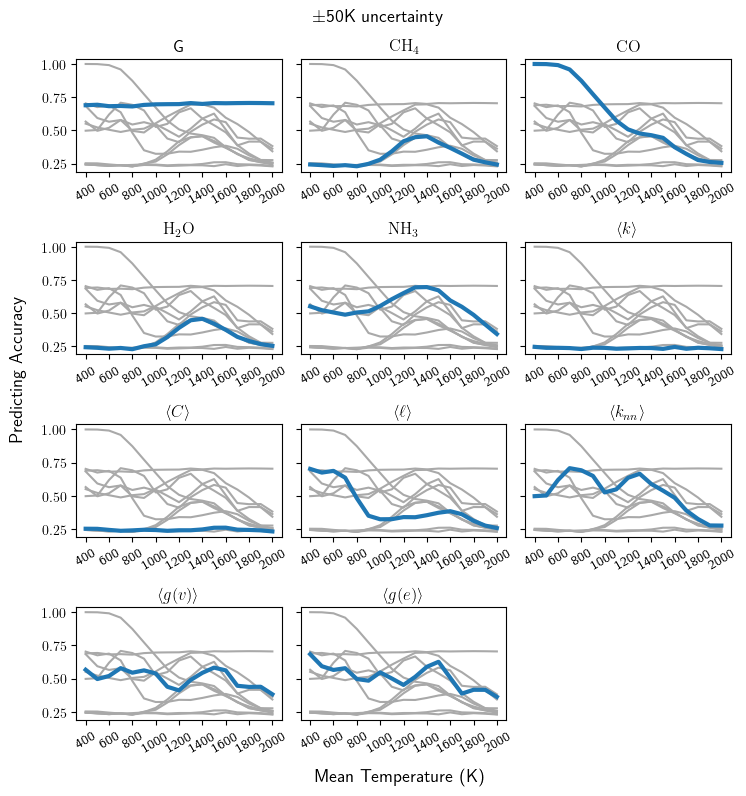

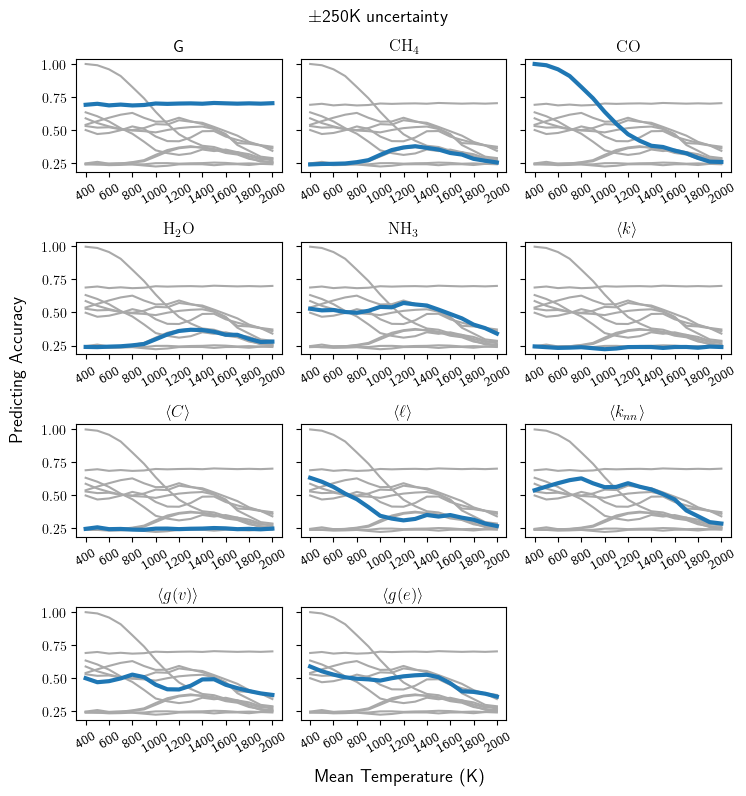

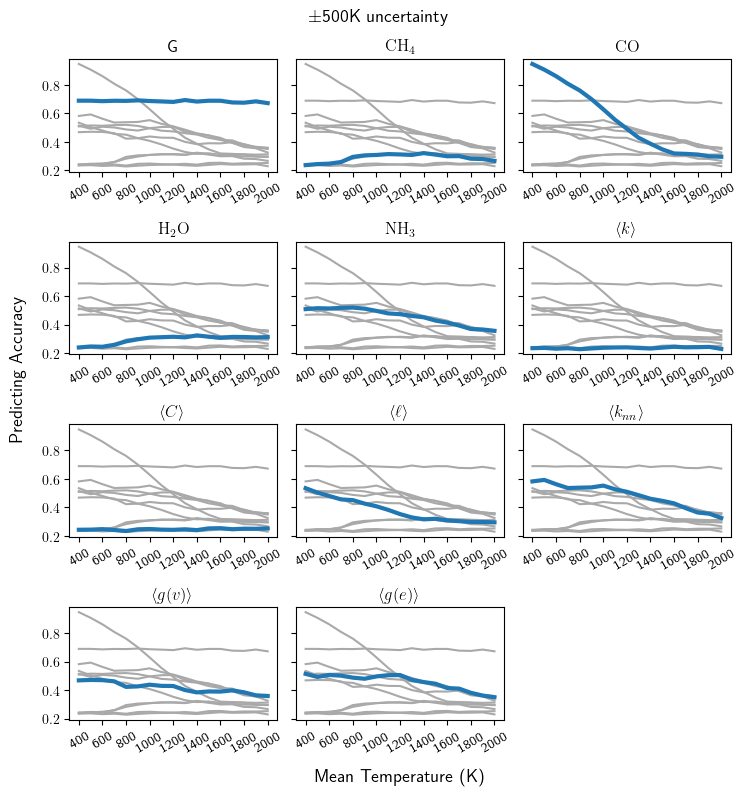

In [5]:
# Supp Figure
for spread in ["50", "250", "500"]:
    fig, ax = plt.subplots(4, 3, sharey = True, figsize = (7.5, 8))

    i = 0; j = 0
    for feature_group in individual_features:
        # all individual_features in the background
        for common_feature_group in individual_features:
            input_path = data_dir + "accuracy_%s.json"%common_feature_group
            with open(input_path) as infile:
                a = json.load(infile)
            ax[i, j].plot(a[spread], label = legend_label[common_feature_group], color='darkgrey')
            
        input_path = data_dir + "accuracy_%s.json"%feature_group
        with open(input_path) as infile:
            a = json.load(infile)
        ax[i, j].plot(a[spread], label = legend_label[feature_group], linewidth=3)
        ax[i, j].set_xticks(np.arange(0, 17, 2))
        ax[i, j].set_xticklabels(np.arange(400, 2100, 200), fontsize=10, rotation=30)
        ax[i, j].yaxis.set_tick_params(labelsize=10)
        ax[i, j].set_title("%s"%legend_label[feature_group])
        
        ### Set white yaxis label for empty space
        if j == 0:
            ax[i, j].set_ylabel("ylabel", color="white",fontsize=15) 
        ### Set white xaxis label for empty space
        if i == 3:
            ax[i, j].set_xlabel("xlabel", color="white",fontsize=15)
            
        if j < 2:
            j += 1
        else:
            i += 1
            j = 0
            
    ### Set common yaxis label        
    fig.text(0.02,0.53, "Predicting Accuracy", ha="center", va="center", rotation=90, fontsize=13)
    ### Set common xaxis label
    fig.text(0.53, 0.02, 'Mean Temperature (K)', ha='center', va="center", fontsize=13)
    
    ### Delete ax with no data 
    for x in ax.flat:
        ## check if something was plotted 
        if not bool(x.has_data()):
            fig.delaxes(x)

    plt.suptitle(r"$\pm$%sK uncertainty"%spread, fontsize=13)
    plt.tight_layout(w_pad=0.5)

    plt.savefig(plot_dir + "/png-files/supp_subplot_accuracy_spread_%s_all_individual_var.png"%spread, dpi=300)
    plt.savefig(plot_dir + "/pdf-files/supp_subplot_accuracy_spread_%s_all_individual_var.pdf"%spread)
    plt.show()